Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review          

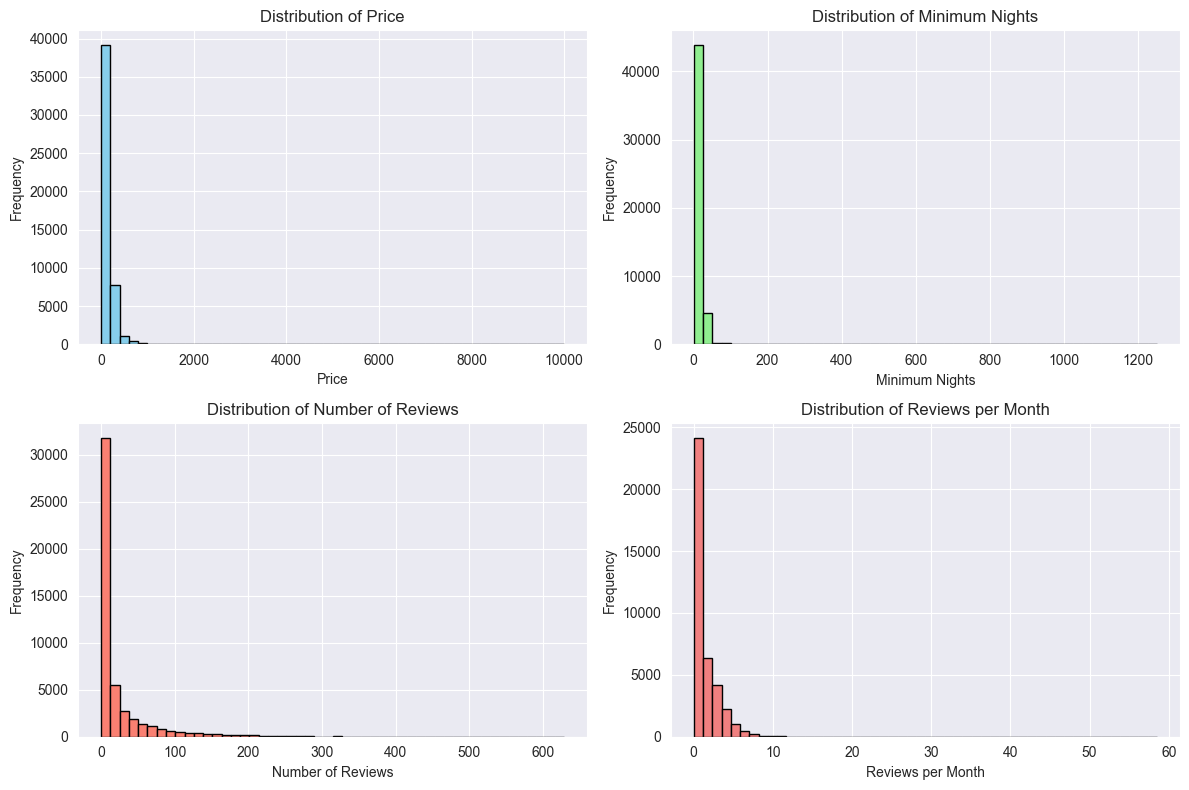

C:\Users\kavin\AppData\Local\Temp\ipykernel_23580\1576119482.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['room_type'], palette='viridis')


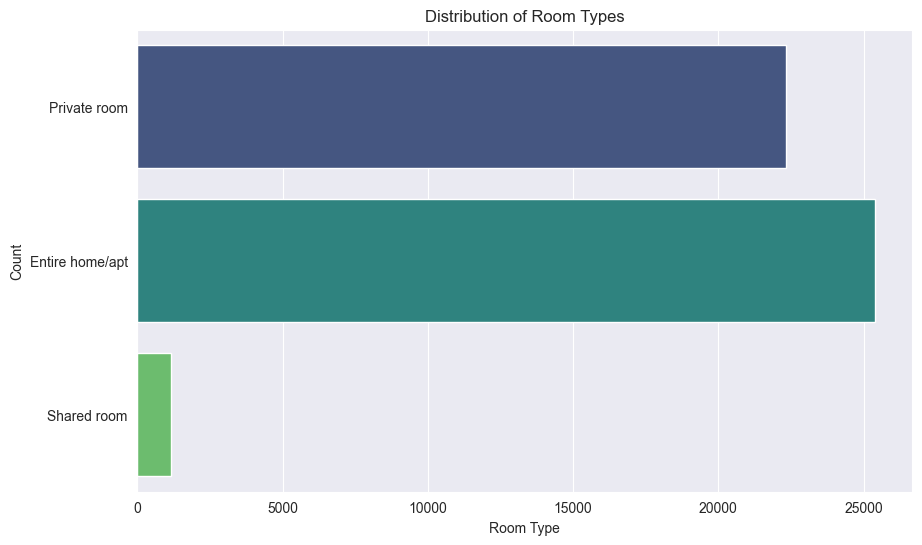

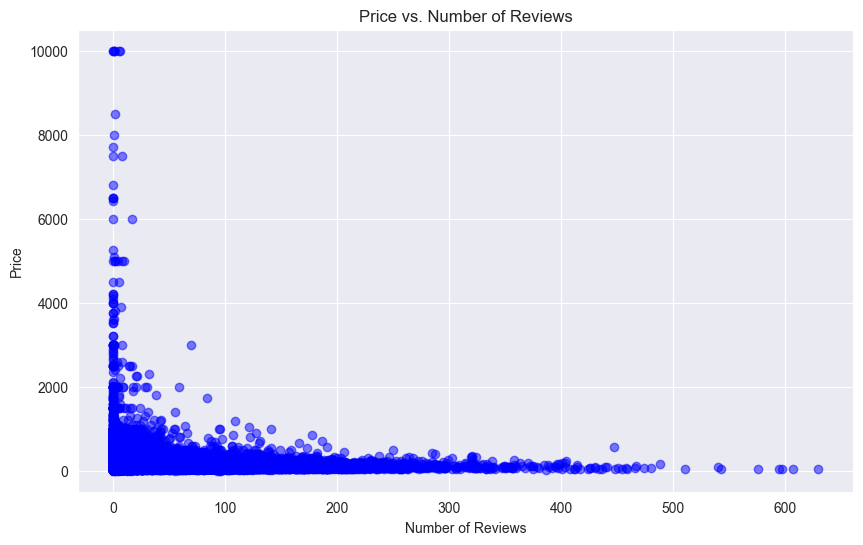

C:\Users\kavin\AppData\Local\Temp\ipykernel_23580\1576119482.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=data, palette='Set2')


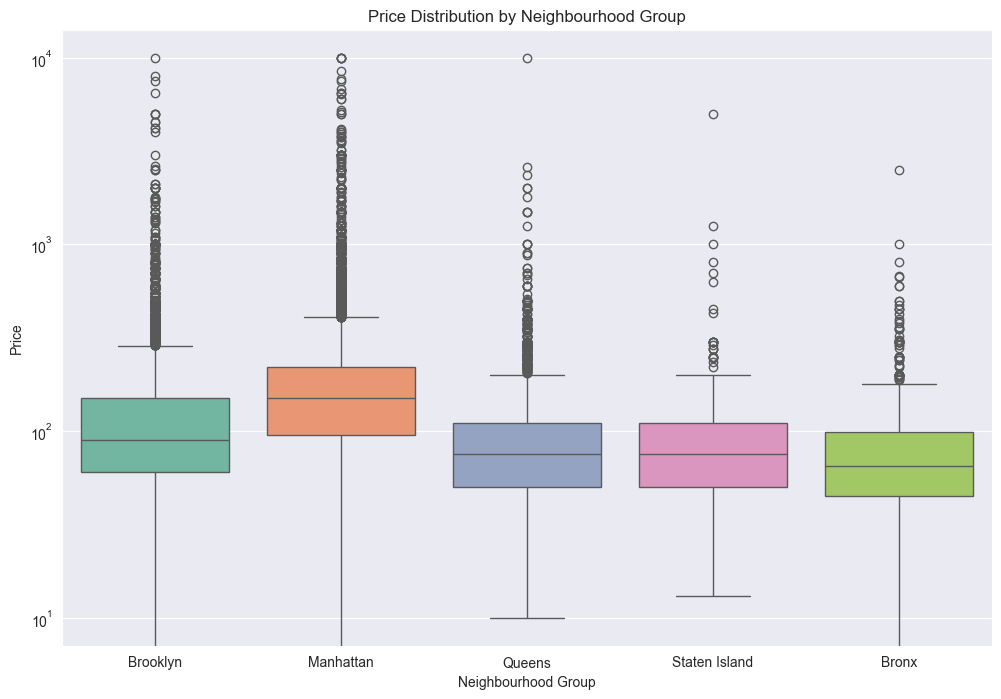

C:\Users\kavin\AppData\Local\Temp\ipykernel_23580\1576119482.py:83: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = data.set_index('last_review').resample('M')['reviews_per_month'].sum()


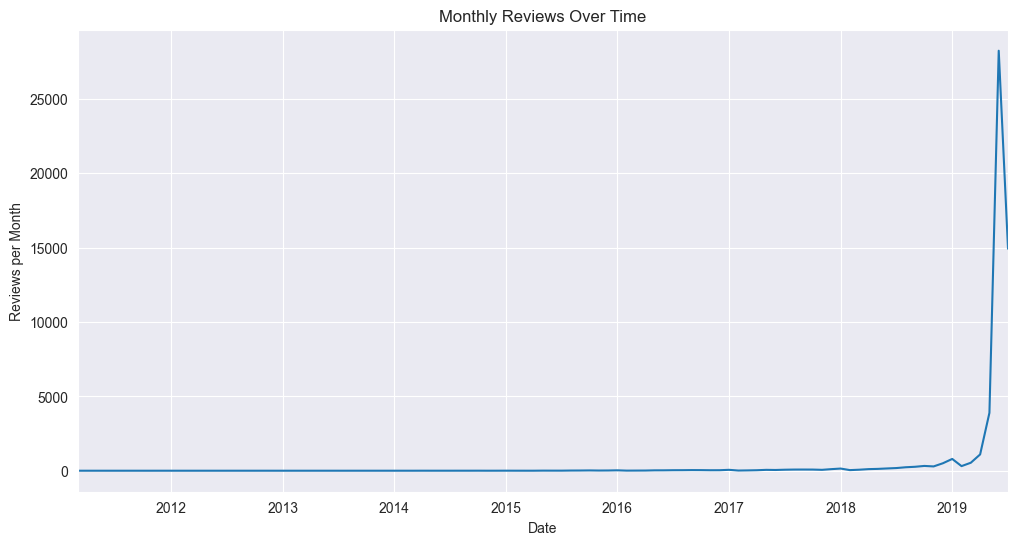

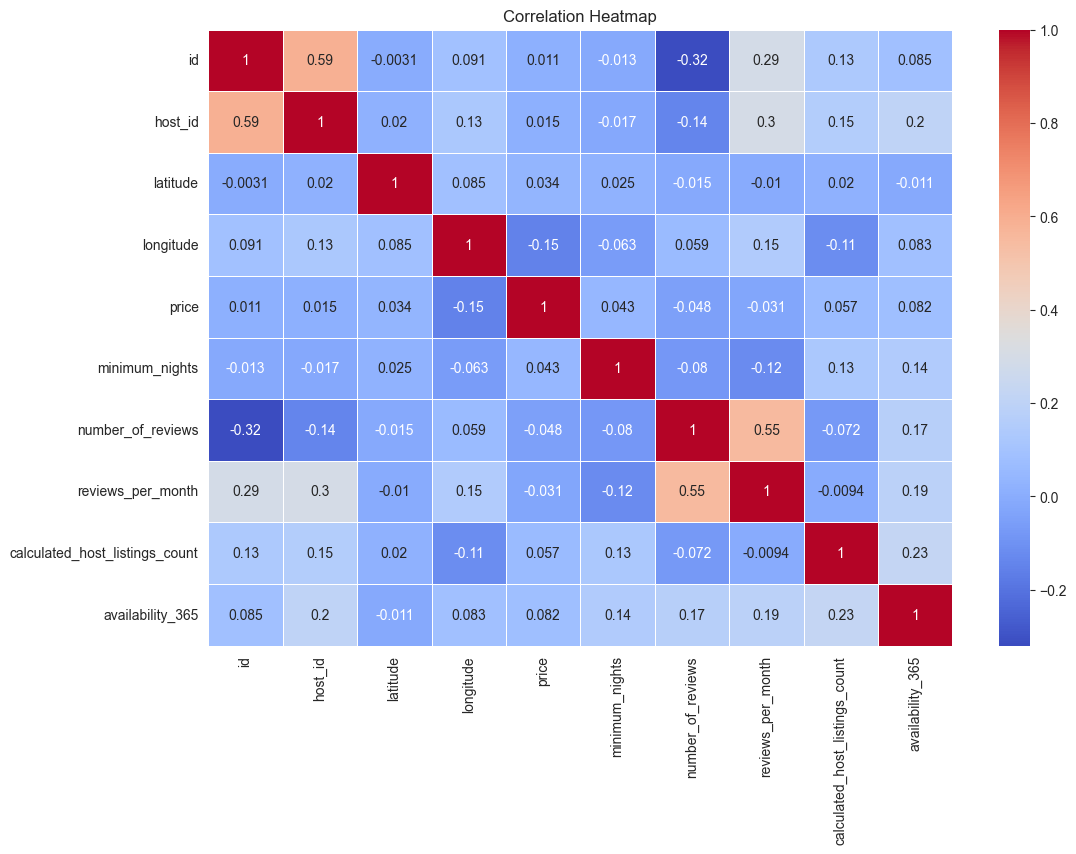

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


# Load the dataset
file_path = "C:\\Users\\kavin\\Downloads\\archive\\AB_NYC_2019.csv"
data = pd.read_csv(file_path)

# Display basic information and descriptive statistics
print("Data Info:")
print(data.info())
print("\nData Description:")
print(data.describe())

# 1. Summary Statistics
summary_stats = data.describe()
print("\nDetailed Summary Statistics:")
print(summary_stats)

# 2. Histograms for Numerical Variables
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(data['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(data['minimum_nights'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(data['number_of_reviews'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(data['reviews_per_month'].dropna(), bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Bar Chart for Room Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['room_type'], palette='viridis')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# 4. Scatter Plot for Price vs. Number of Reviews
plt.figure(figsize=(10, 6))
plt.scatter(data['number_of_reviews'], data['price'], alpha=0.5, c='blue')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

# 5. Box Plot for Price Across Different Neighbourhood Groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=data, palette='Set2')
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

# 6. Time Series Analysis
# Convert last_review to datetime
data['last_review'] = pd.to_datetime(data['last_review'])

# Group by month and year to analyze trends
monthly_reviews = data.set_index('last_review').resample('M')['reviews_per_month'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
monthly_reviews.plot()
plt.title('Monthly Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Reviews per Month')
plt.show()

# 7. Price Heatmaps
# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in data.iterrows()]

# Create a heatmap
map_ = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
HeatMap(heat_data).add_to(map_)

# 8. Correlation Heatmap
# Filter out non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
